#### Now, we extend kernel method to 2D case

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

x shape: (114, 2)
y shape: (114,)


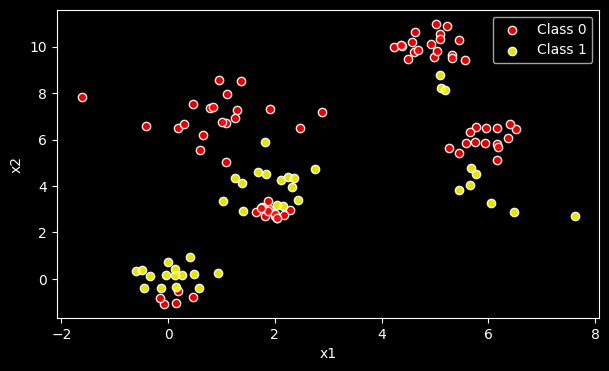

In [ ]:
np.random.seed(42)

def generate_class_data(centers, stds, num_points_list):

    data = []
    for center, std, num_points in zip(centers, stds, num_points_list):
        cluster_data = np.random.normal(center, std, (num_points, 2))
        data.append(cluster_data)

    return np.concatenate(data)

# Class 0
centers_class0 = [[0, -1], [2, 3], [6, 6], [1, 7], [5, 10]]
stds_class0 = [0.3, 0.2, 0.5, 1, 0.4]
num_points_class0_list = [5, 15, 15, 20, 19]
class0_data = generate_class_data(centers_class0, stds_class0, num_points_class0_list)

# Class 1
centers_class1 = [[0, 0], [2, 4], [5, 8], [6, 4]]
stds_class1 = [0.5, 0.7, 0.2, 0.7]
num_points_class1_list = [15, 15, 3, 7]
class1_data = generate_class_data(centers_class1, stds_class1, num_points_class1_list)

# Combine data
x = np.concatenate([class0_data, class1_data])
print(f'x shape: {x.shape}')
y = np.array([0] * sum(num_points_class0_list) + [1] * sum(num_points_class1_list))
print(f'y shape: {y.shape}')

plt.figure(figsize=(7, 4))
plt.scatter(class0_data[:, 0], class0_data[:, 1], color='red', label='Class 0', alpha=0.9, edgecolors='w')
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='yellow', label='Class 1', alpha=0.9, edgecolors='w')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
kernel = 'rbf'

def square_kernel(x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    return np.vstack([x1**2, x2**2, x1*x2, x1, x2, np.ones(len(x))]).T

def rbf_kernel(x, sigma):
    num_points = x.shape[0]
    k = np.zeros((num_points, num_points)) # this matrix is symmetric
    for i in range(num_points):
        for j in range(num_points):
            sq_dist = np.sum((x[i] - x[j])**2)
            k[i, j] = np.exp(-sq_dist / (2 * sigma**2))
    return k

if kernel == 'rbf':
    sigma = 0.5
    x_k = rbf_kernel(x, sigma)
    print(f'x_rbf shape: {x_k.shape}')

    # Initial guess
    theta = 0.5 * np.ones(x_k.shape[1])
    print(f'theta shape: {theta.shape}')

elif kernel == 'square':
    x_k = square_kernel(x)
    print(f'x_sq shape: {x_k.shape}')

    # Initial guess
    theta = 0.5 * np.ones(x_k.shape[1])
    print(f'theta shape: {theta.shape}')

x_rbf shape: (114, 114)
theta shape: (114,)


Iteration 0: Loss = 2.578832459474077
Iteration 500: Loss = 0.08472976540948723
Iteration 1000: Loss = 0.065977292004624
x_test_rbf shape: (10000, 114)


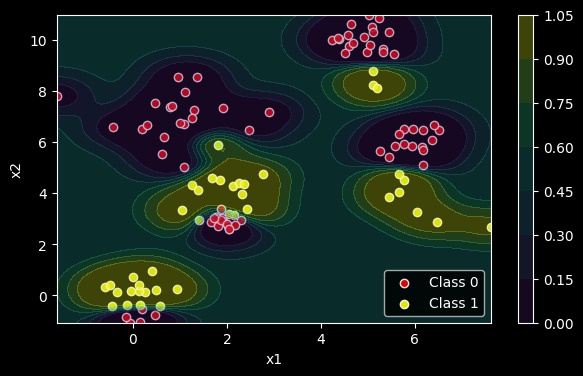

In [ ]:
learning_rate = 0.01
num_iterations = 1500

# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss
loss_values = []

for i in range(num_iterations):
    # Forward pass
    y_pred = x_k @ theta  # same shape as y
    h_pred = sigmoid(y_pred)  # same shape as y

    # Compute loss
    loss = -y*np.log(h_pred) - (1 - y)*np.log(1 - h_pred) # same shape as y
    loss = np.mean(loss) # take average, a scalar

    # Compute gradient
    d_theta = x_k.T @ (h_pred - y)  # same shape as theta, each row is gradient for each parameter

    # Update parameters
    theta -= learning_rate * d_theta # same shape as theta

    if i % 500 == 0:
        print(f'Iteration {i}: Loss = {loss}')

def rbf_kernel_test(x_test, x, sigma):
    num_test_points = x_test.shape[0]
    num_train_points = x.shape[0]
    k_test = np.zeros((num_test_points, num_train_points))
    for i in range(num_test_points):
        for j in range(num_train_points):
            sq_dist = np.sum((x_test[i] - x[j])**2)
            k_test[i, j] = np.exp(-sq_dist / (2 * sigma**2))
    return k_test

# Generate test points for 2D data
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_test = np.linspace(x1_min, x1_max, 100)
x2_test = np.linspace(x2_min, x2_max, 100)
x1_test, x2_test = np.meshgrid(x1_test, x2_test)
x_test = np.c_[x1_test.ravel(), x2_test.ravel()]  # shape (10000, 2)

if kernel == 'rbf':
    x_test_kernel = rbf_kernel_test(x_test, x, sigma)
    print(f'x_test_rbf shape: {x_test_kernel.shape}')
elif kernel == 'square':
    x_test_kernel = square_kernel(x_test)
    print(f'x_test_sq shape: {x_test_kernel.shape}')

y_test = sigmoid(x_test_kernel @ theta)  # shape (10000,)
y_test = y_test.reshape(x1_test.shape)  # shape (100, 100)

plt.figure(figsize=(7, 4))
plt.scatter(class0_data[:, 0], class0_data[:, 1], color='red', label='Class 0', alpha=0.9, edgecolors='w')
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='yellow', label='Class 1', alpha=0.9, edgecolors='w')

plt.contourf(x1_test, x2_test, y_test, alpha=0.3)
plt.colorbar()

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')
plt.show()